In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [110]:
def sep( n: int = 80, sep: str = "="):
    print(sep*n)

def new_section(string: str, n: int = 80, sep: str = "="):
    m = len(string)
    if n < m:
        n = m + 6
    padding = (n-m+1)//2
    print(sep*padding + " " + string + " " + sep*padding)


In [111]:
coffee_quality = pd.read_csv("Dataset/merged_data_cleaned_var.csv")

In [112]:
new_section("Coffee Quality Data")
print(coffee_quality.head())
sep()

=============================== Coffee Quality Data ===============================
   Species  Variety Processing.Method  Total.Cup.Points  Moisture  \
0  Arabica    Other      Washed / Wet             89.92      0.12   
1  Arabica    Other      Washed / Wet             88.83      0.12   
2  Arabica    Other      Washed / Wet             88.75      0.11   
3  Arabica    Other     Natural / Dry             88.25      0.10   
4  Arabica  Catimor      Washed / Wet             87.25      0.10   

          Color  
0         Green  
1         Green  
2  Bluish-Green  
3         Green  
4         Green  


In [130]:
new_section("Coffee Quality Data Columns")
print("Número de linhas: ", coffee_quality.shape[0])
print("Número de colunas: ", coffee_quality.shape[1])
print(coffee_quality.columns)
sep()

=========================== Coffee Quality Data Columns ===========================
Número de linhas:  953
Número de colunas:  6
Index(['Species', 'Variety', 'Processing.Method', 'Total.Cup.Points',
       'Moisture', 'Color'],
      dtype='object')


In [ ]:
new_section("Frequência por espécie")
frequencia_especie = coffee_quality["Species"].value_counts()

# Criar gráfico de barras:
plt.figure(figsize=(10,6))
sns.barplot(x=frequencia_especie.index, y=frequencia_especie.values)

In [131]:
new_section("Coffee Merged Quality Data Total.Cup.Points and Description",1)
balance_stats = coffee_quality['Total.Cup.Points'].describe()
print(balance_stats)
sep(len("Coffee Merged Quality Data Total.Cup.Points and Description")+8)

=== Coffee Merged Quality Data Total.Cup.Points and Description ===
count    953.000000
mean      82.131238
std        2.522532
min       59.830000
25%       81.170000
50%       82.420000
75%       83.500000
max       89.920000
Name: Total.Cup.Points, dtype: float64


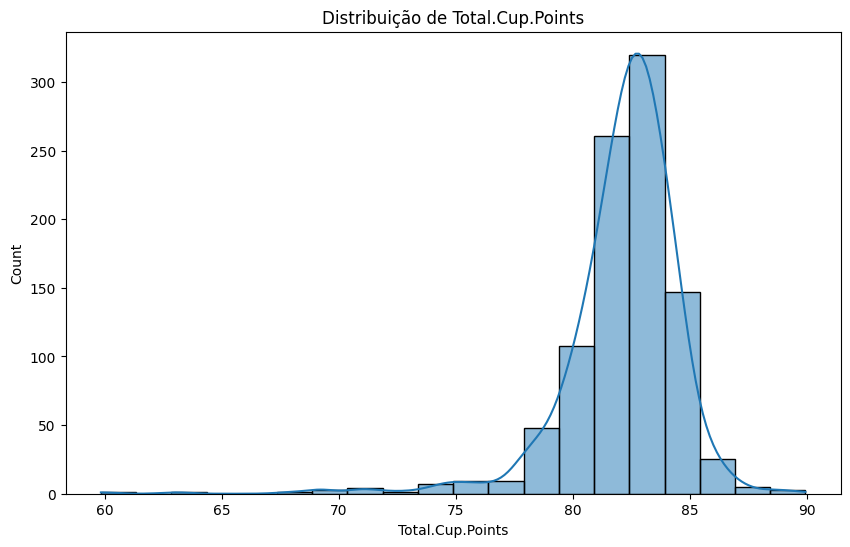

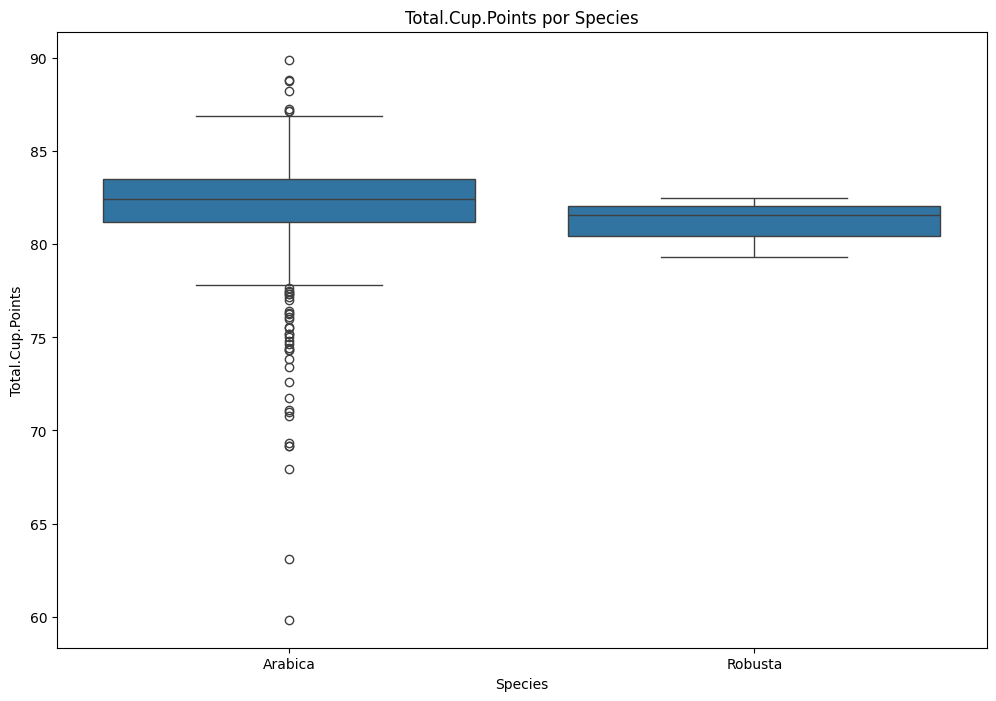

In [132]:
# Histograma de Total.Cup.Points
plt.figure(figsize=(10, 6))
sns.histplot(coffee_quality['Total.Cup.Points'], bins=20, kde=True)
plt.title('Distribuição de Total.Cup.Points')
plt.show()

# Boxplots para Total.Cup.Points por Species
plt.figure(figsize=(12, 8))
sns.boxplot(x='Species', y='Total.Cup.Points', data=coffee_quality)
plt.title('Total.Cup.Points por Species')
plt.show()

                  Total.Cup.Points  Moisture
Total.Cup.Points          1.000000 -0.099465
Moisture                 -0.099465  1.000000


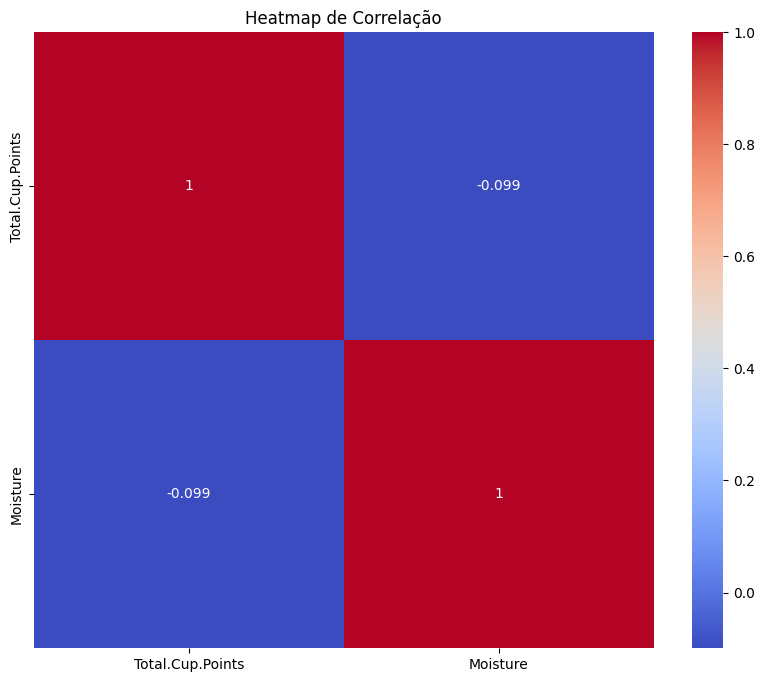

In [133]:
correlation = coffee_quality[['Total.Cup.Points', 'Moisture']].corr()
print(correlation)

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(coffee_quality[['Total.Cup.Points', 'Moisture']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

In [134]:
from scipy.stats import f_oneway

# ANOVA para Total.Cup.Points por Species
anova_result = f_oneway(*[coffee_quality[coffee_quality['Species'] == species]['Total.Cup.Points'] for species in coffee_quality['Species'].unique()])
print(f'ANOVA result for Species: {anova_result}')

ANOVA result for Species: F_onewayResult(statistic=0.46756970230852546, pvalue=0.4942739219288277)


C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1027202308.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(coffee_quality["Total.Cup.Points"], shade=True)  # shade=True preenche a área sob a curva


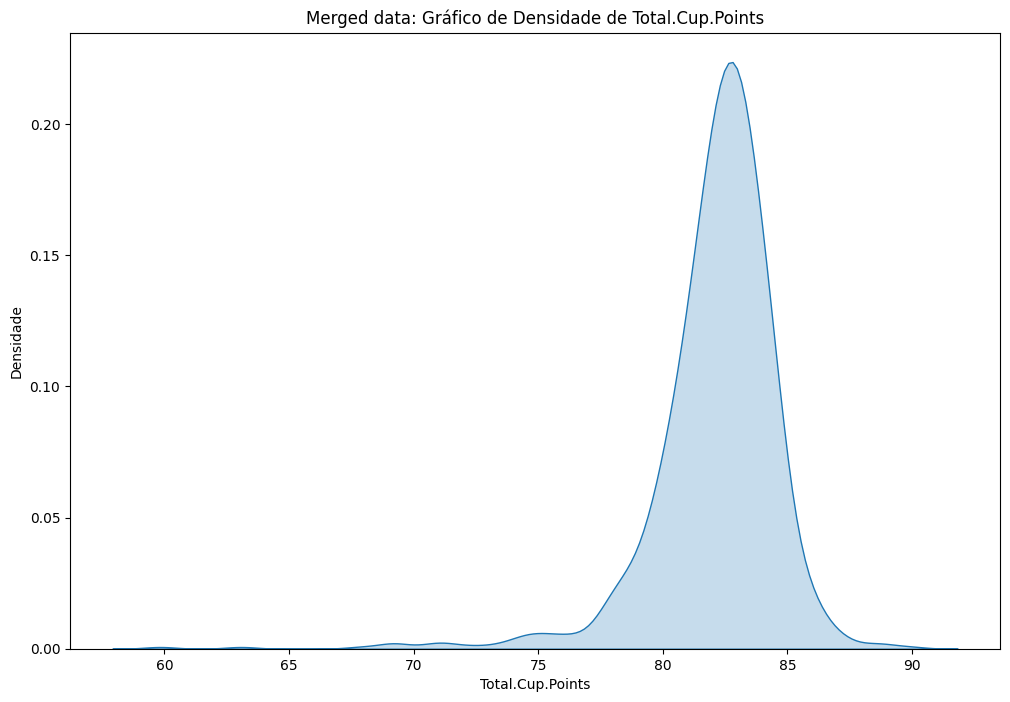

In [137]:
plt.figure(figsize=(12, 8))  
sns.kdeplot(coffee_quality["Total.Cup.Points"], shade=True)  # shade=True preenche a área sob a curva
plt.xlabel("Total.Cup.Points") 
plt.ylabel("Densidade") 
plt.title("Merged data: Gráfico de Densidade de Total.Cup.Points")  
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\2867565619.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=specie, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\2867565619.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=specie, shade=True)


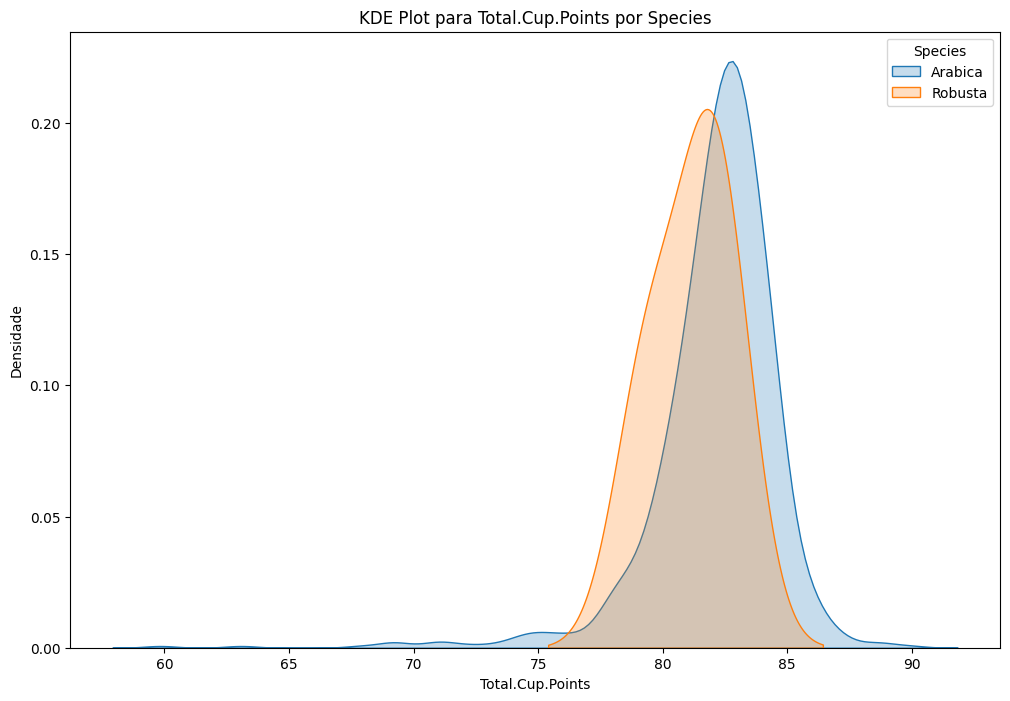

In [120]:
plt.figure(figsize=(12, 8))
for specie in coffee_quality['Species'].unique():
    subset = coffee_quality[coffee_quality['Species'] == specie]
    sns.kdeplot(subset['Total.Cup.Points'], label=specie, shade=True)
plt.xlabel('Total.Cup.Points')
plt.ylabel('Densidade')
plt.title('KDE Plot para Total.Cup.Points por Species')
plt.legend(title='Species')
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\198265406.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\198265406.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])


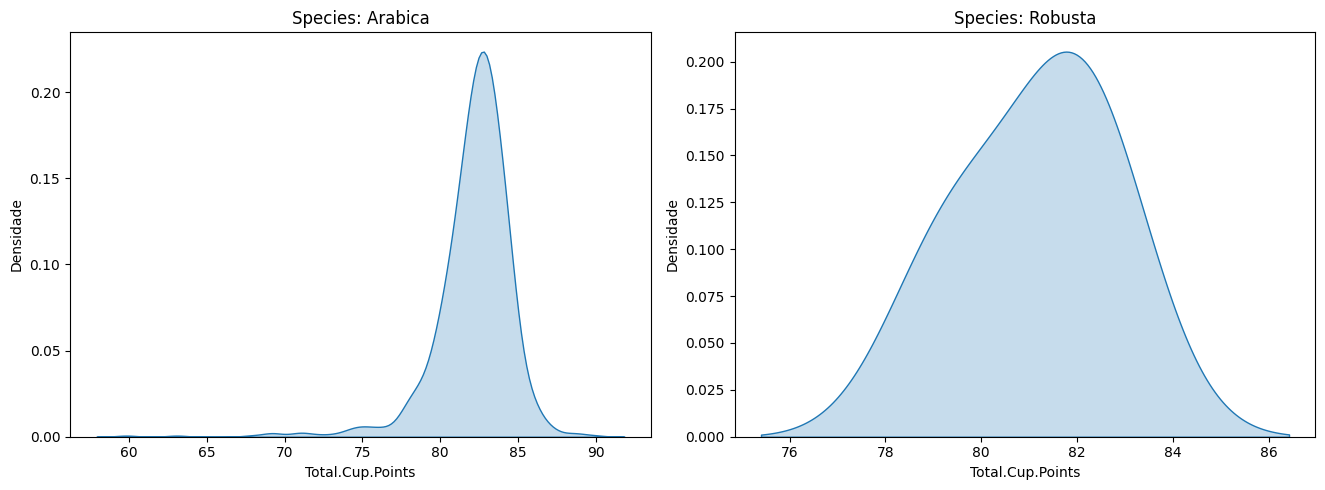

In [121]:
species_list = coffee_quality['Species'].unique()
num_species = len(species_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_species + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, specie in enumerate(species_list):
    subset = coffee_quality[coffee_quality['Species'] == specie]
    sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
    axes[i].set_title(f'Species: {specie}')
    axes[i].set_xlabel('Total.Cup.Points')
    axes[i].set_ylabel('Densidade')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1065880871.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1065880871.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1065880871.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])


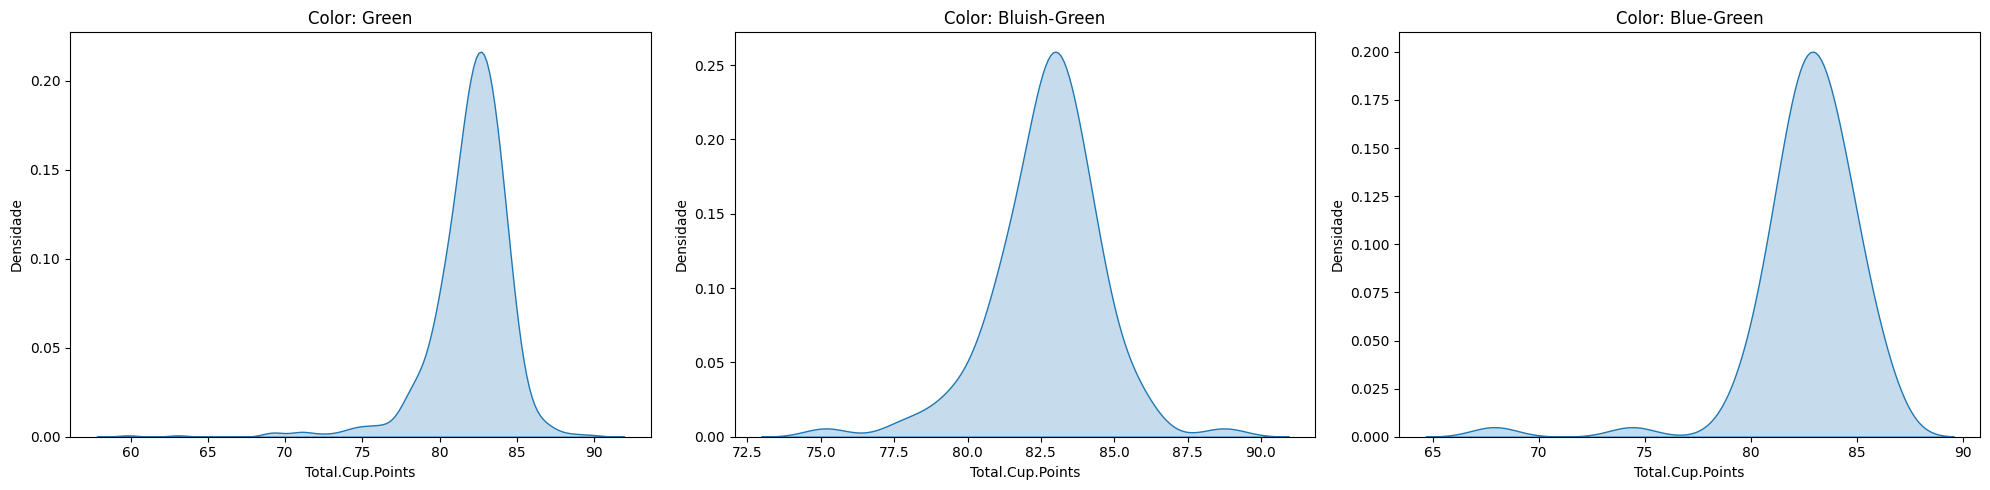

In [122]:

color_list = coffee_quality['Color'].unique()
num_colors = len(color_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_colors + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, color in enumerate(color_list):
    subset = coffee_quality[coffee_quality['Color'] == color]
    sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
    axes[i].set_title(f'Color: {color}')
    axes[i].set_xlabel('Total.Cup.Points')
    axes[i].set_ylabel('Densidade')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1549938527.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=color, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1549938527.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=color, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1549938527.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=color, shade=True)


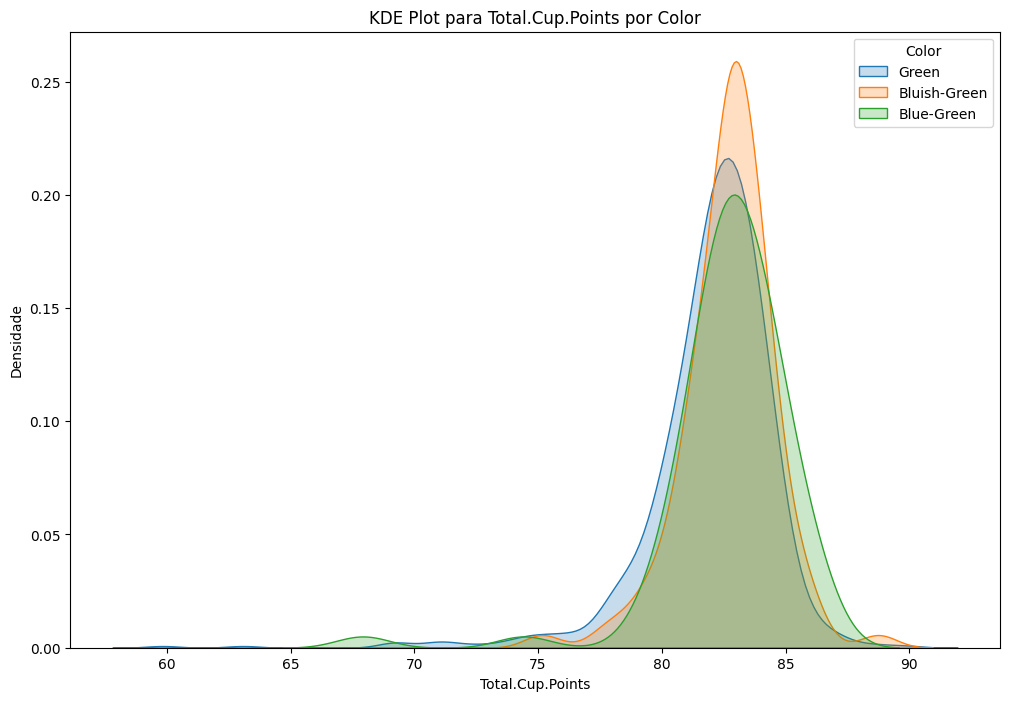

In [123]:
plt.figure(figsize=(12, 8))
for color in coffee_quality['Color'].unique():
    subset = coffee_quality[coffee_quality['Color'] == color]
    sns.kdeplot(subset['Total.Cup.Points'], label=color, shade=True)
plt.xlabel('Total.Cup.Points')
plt.ylabel('Densidade')
plt.title('KDE Plot para Total.Cup.Points por Color')
plt.legend(title='Color')
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\3035555675.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(coffee_quality['Moisture'], shade=True)


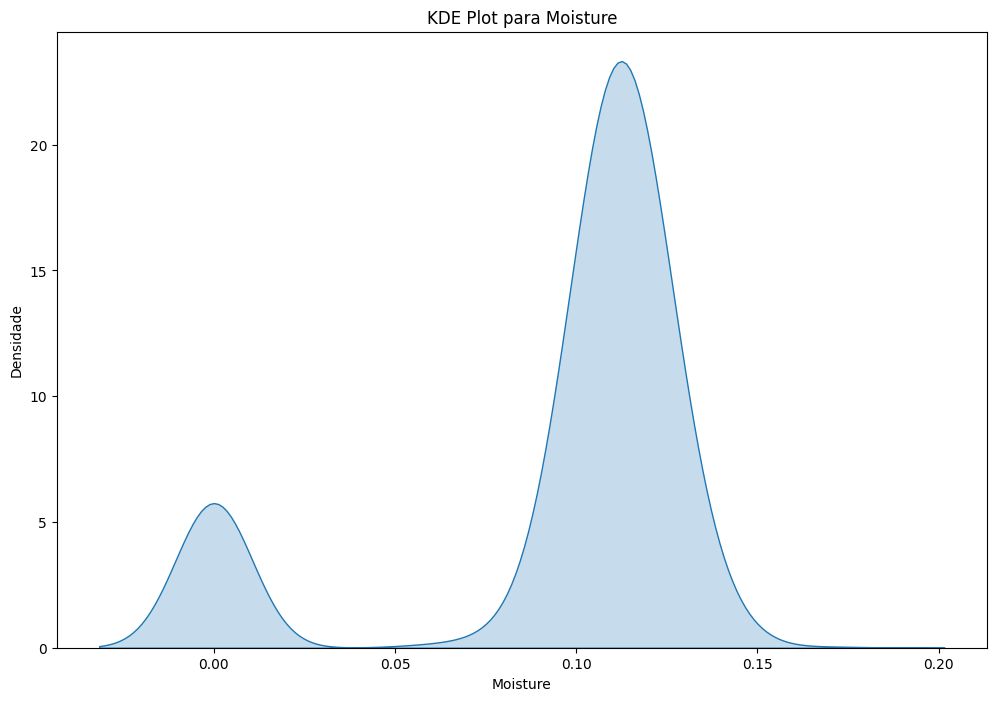

In [124]:
plt.figure(figsize=(12, 8))
sns.kdeplot(coffee_quality['Moisture'], shade=True)
plt.xlabel('Moisture')
plt.ylabel('Densidade')
plt.title('KDE Plot para Moisture')
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\802957603.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\802957603.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\802957603.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\802957603.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`

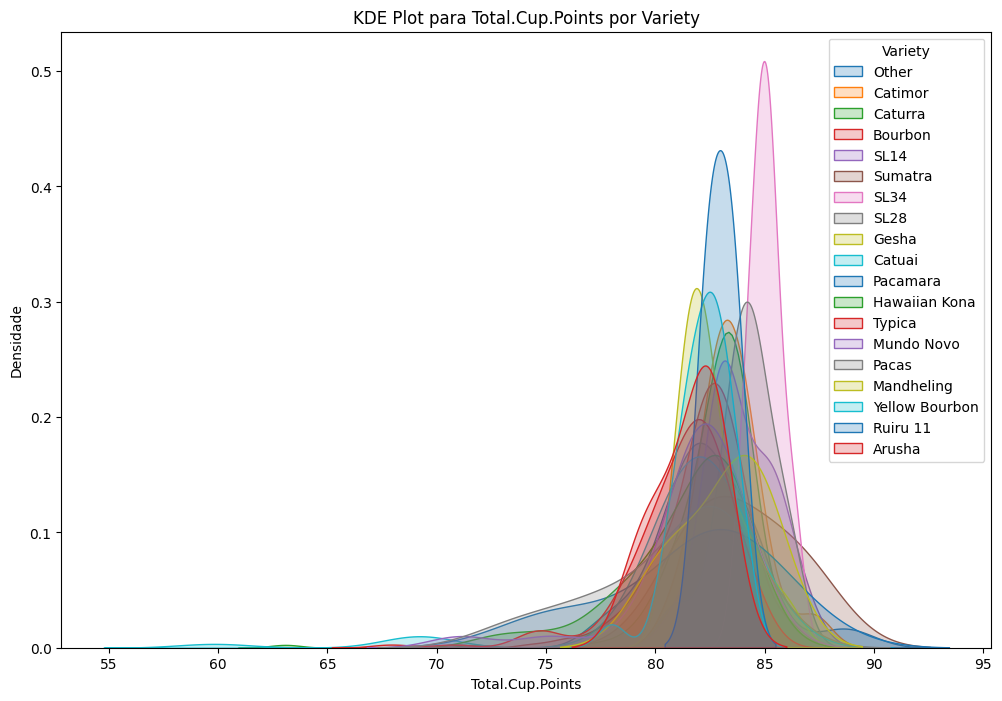

In [125]:
plt.figure(figsize=(12, 8))
for variety in coffee_quality['Variety'].unique():
    subset = coffee_quality[coffee_quality['Variety'] == variety]
    sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
plt.xlabel('Total.Cup.Points')
plt.ylabel('Densidade')
plt.title('KDE Plot para Total.Cup.Points por Variety')
plt.legend(title='Variety')
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1553840962.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1553840962.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1553840962.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1553840962.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`;

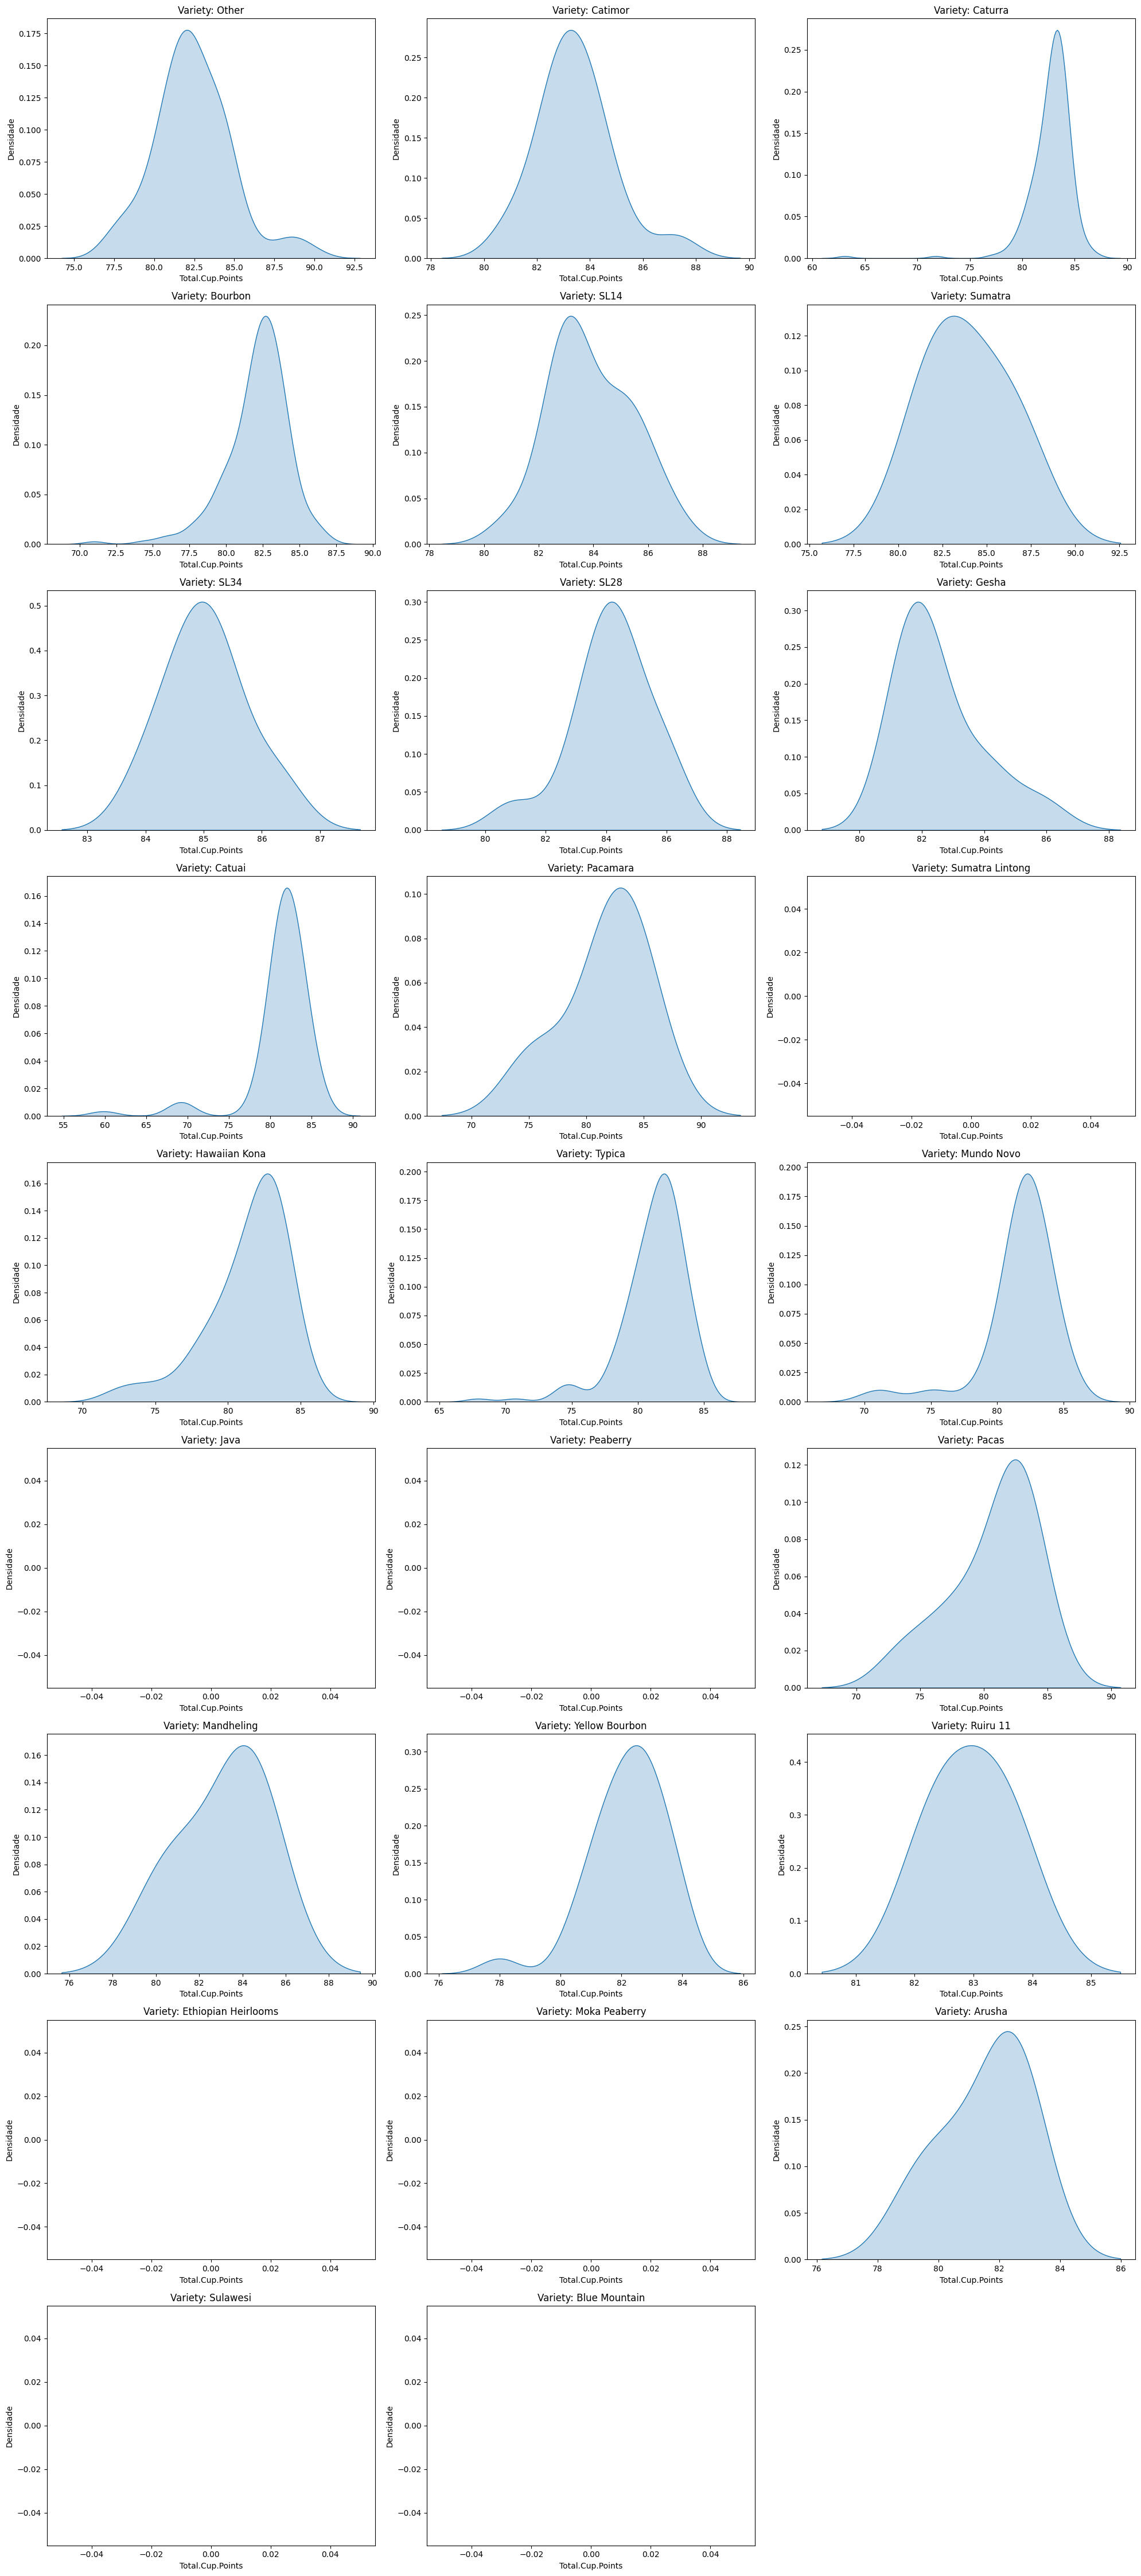

In [126]:

variety_list = coffee_quality['Variety'].unique()
num_varieties = len(variety_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_varieties + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, variety in enumerate(variety_list):
    subset = coffee_quality[coffee_quality['Variety'] == variety]
    sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
    axes[i].set_title(f'Variety: {variety}')
    axes[i].set_xlabel('Total.Cup.Points')
    axes[i].set_ylabel('Densidade')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1419183000.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1419183000.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1419183000.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1419183000.py:4: FutureWarning: 

`shade` is now deprecated in favor of `f

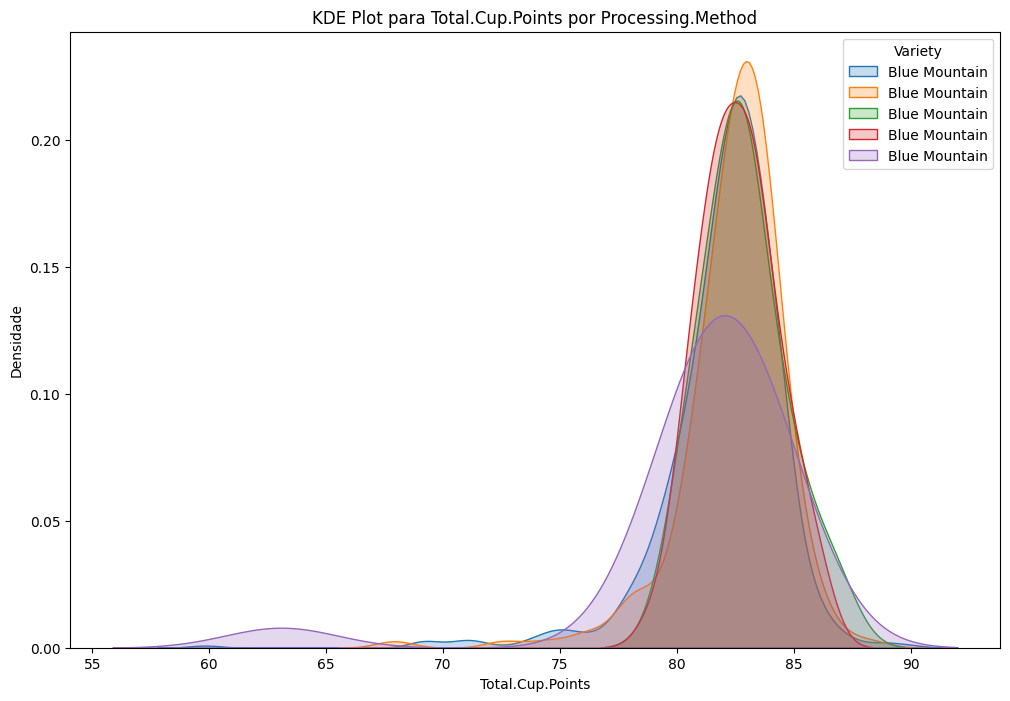

In [127]:
plt.figure(figsize=(12, 8))
for Processing_Method in coffee_quality['Processing.Method'].unique():
    subset = coffee_quality[coffee_quality['Processing.Method'] == Processing_Method]
    sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
plt.xlabel('Total.Cup.Points')
plt.ylabel('Densidade')
plt.title('KDE Plot para Total.Cup.Points por Processing.Method')
plt.legend(title='Variety')
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\855980286.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\855980286.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\855980286.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\855980286.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; set

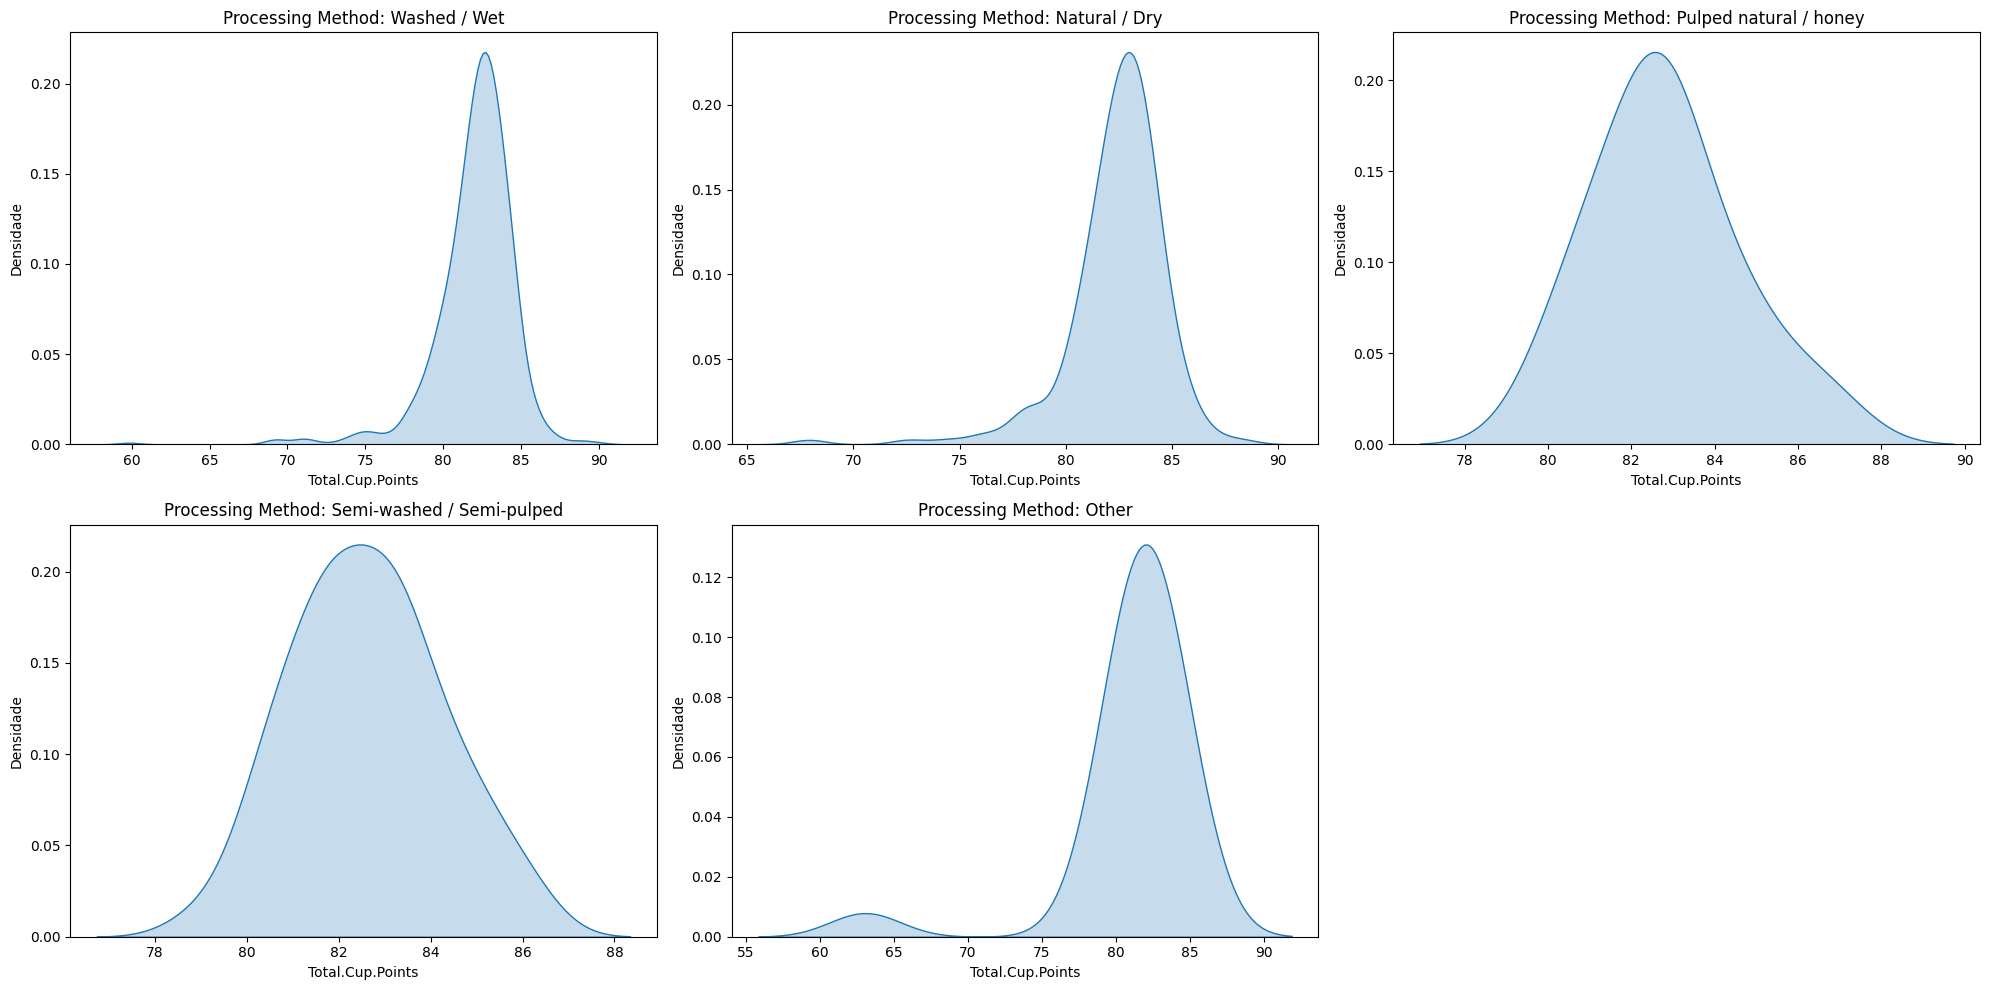

In [128]:
method_list = coffee_quality['Processing.Method'].unique()
num_methods = len(method_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_methods + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, method in enumerate(method_list):
    subset = coffee_quality[coffee_quality['Processing.Method'] == method]
    sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
    axes[i].set_title(f'Processing Method: {method}')
    axes[i].set_xlabel('Total.Cup.Points')
    axes[i].set_ylabel('Densidade')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [129]:
country_counts = coffee_quality["Country.of.Origin"].value_counts()
plt.figure(figsize=(12, 8))  
plt.bar(country_counts.index, country_counts.values) 
plt.xlabel("Países de Origem") 
plt.ylabel("Frequência") 
plt.xticks(rotation=90)  
plt.title("Histograma de Frequência da Origem do Café por País")  
plt.show() 

KeyError: 'Country.of.Origin'

In [ ]:
countries = coffee_quality["Country.of.Origin"].unique()
new_section("Unique Countries")
print(len(countries))
print(countries)
sep()

================================ Unique Countries ================================
37
['Ethiopia' 'Guatemala' 'Brazil' 'Peru' 'United States'
 'United States (Hawaii)' 'Indonesia' 'China' 'Costa Rica' 'Mexico'
 'Uganda' 'Honduras' 'Taiwan' 'Nicaragua' 'Tanzania, United Republic Of'
 'Kenya' 'Thailand' 'Colombia' 'Panama' 'Papua New Guinea' 'El Salvador'
 'Japan' 'Ecuador' 'United States (Puerto Rico)' 'Haiti' 'Burundi'
 'Vietnam' 'Philippines' 'Rwanda' 'Malawi' 'Laos' 'Zambia' 'Myanmar'
 'Mauritius' 'Cote d?Ivoire' nan 'India']


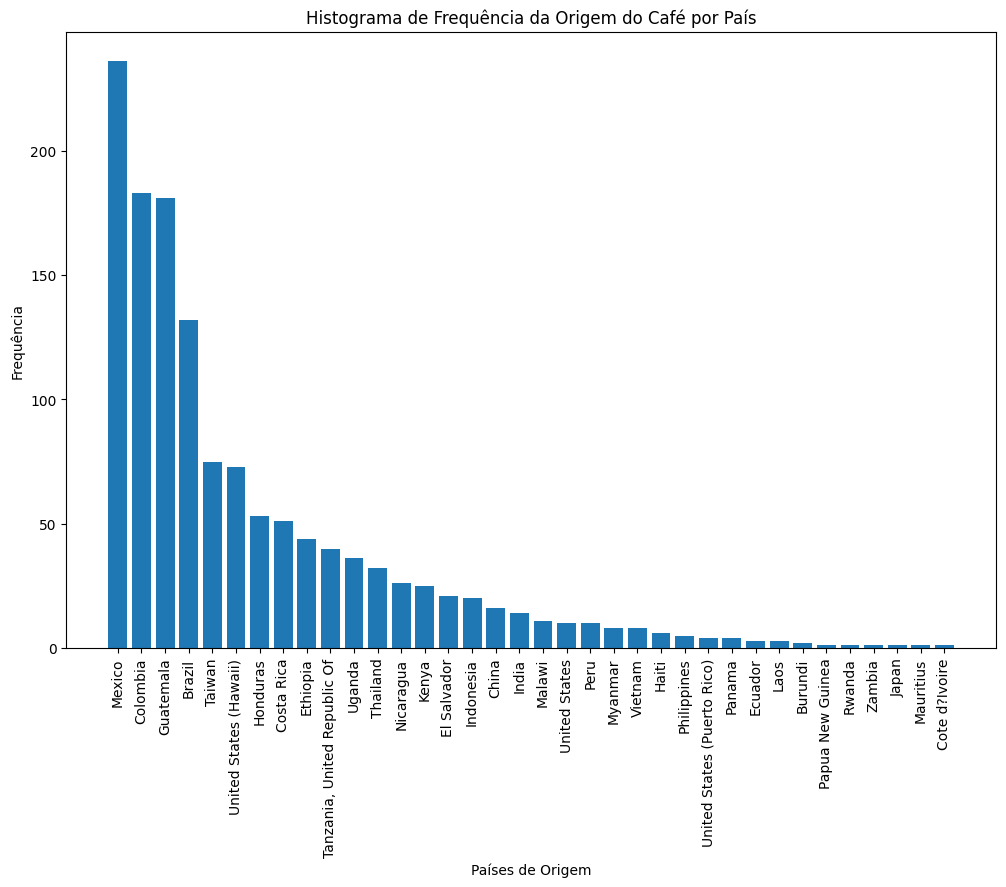

In [ ]:
country_counts = coffee_quality["Country.of.Origin"].value_counts()
plt.figure(figsize=(12, 8))  
plt.bar(country_counts.index, country_counts.values) 
plt.xlabel("Países de Origem") 
plt.ylabel("Frequência") 
plt.xticks(rotation=90)  
plt.title("Histograma de Frequência da Origem do Café por País")  
plt.show()  

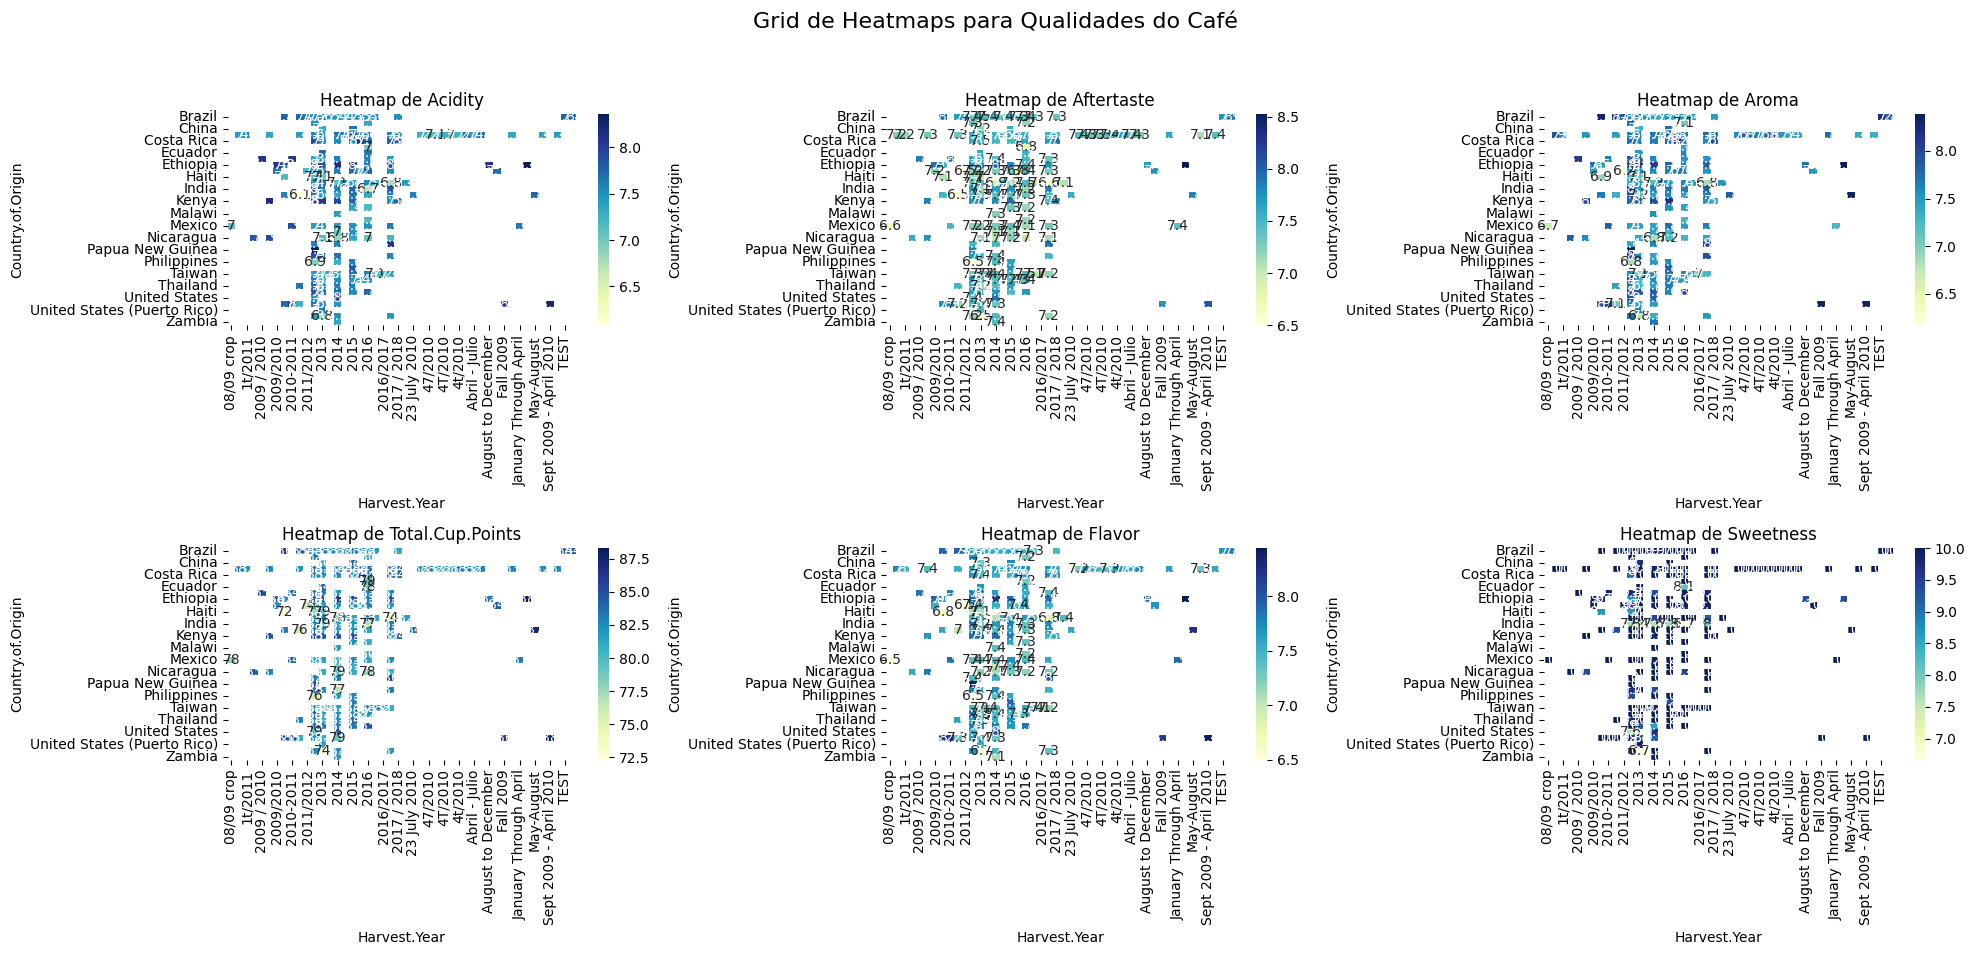

In [ ]:
year_col = "Harvest.Year"
country_col = "Country.of.Origin"

attributes = ["Acidity", "Aftertaste", "Aroma", "Total.Cup.Points", "Flavor", "Sweetness"]

num_rows = 2 
num_cols = 3 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
fig.suptitle("Grid de Heatmaps para Qualidades do Café", fontsize=16)

for i, attribute in enumerate(attributes):
    heatmap_data = coffee_quality.pivot_table(
        index=country_col, 
        columns=year_col, 
        values=attribute, 
        aggfunc="mean"
    )
    
    row = i // num_cols
    col = i % num_cols
    
    sns.heatmap(heatmap_data, ax=axes[row, col], cmap="YlGnBu", annot=True)
    axes[row, col].set_title(f"Heatmap de {attribute}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

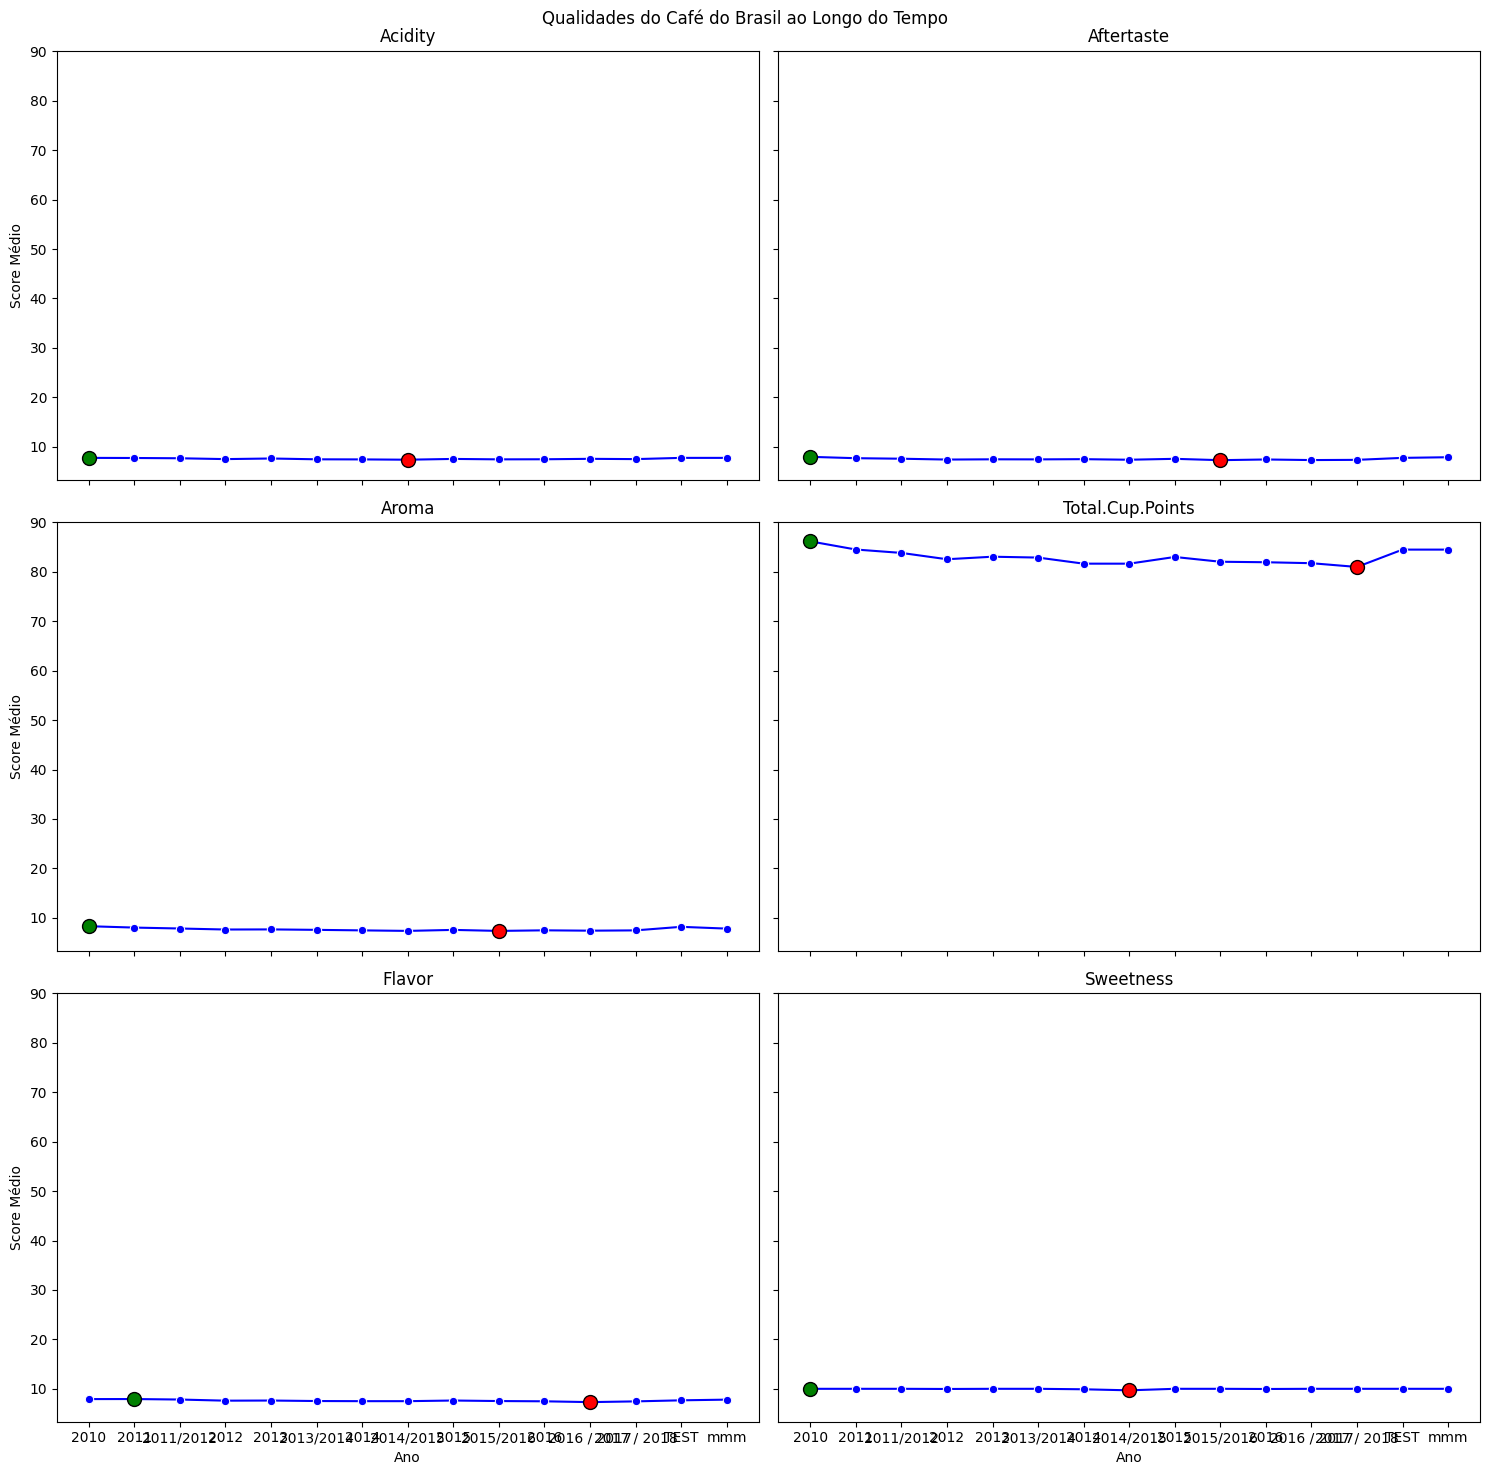

In [ ]:
df_brazil = coffee_quality[coffee_quality["Country.of.Origin"] == "Brazil"]

attributes = ["Acidity", "Aftertaste", "Aroma", "Total.Cup.Points", "Flavor", "Sweetness"]

fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle("Qualidades do Café do Brasil ao Longo do Tempo")

for i, attribute in enumerate(attributes):
    ax = axes[i//2, i%2]  

    group_data = df_brazil.groupby("Harvest.Year")[attribute].mean()

    max_year = group_data.idxmax()
    min_year = group_data.idxmin()
    max_score = group_data.max()
    min_score = group_data.min()

    sns.lineplot(ax=ax, x=group_data.index, y=group_data.values, marker="o", color="blue")

    ax.scatter(max_year, max_score, color="green", s=100, edgecolor="black", zorder=5)

    ax.scatter(min_year, min_score, color="red", s=100, edgecolor="black", zorder=5)

    ax.set_title(attribute)
    ax.set_xlabel("Ano")
    ax.set_ylabel("Score Médio")

plt.tight_layout()
plt.show()

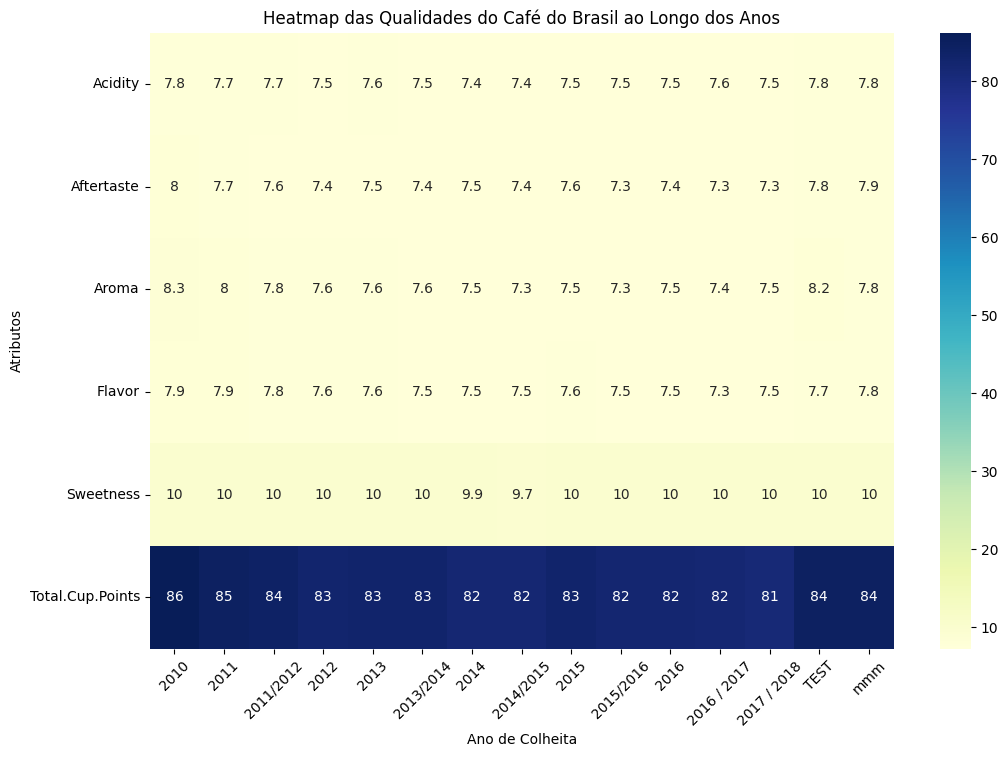

In [ ]:
attributes = ["Acidity", "Aftertaste", "Aroma", "Total.Cup.Points", "Flavor", "Sweetness"]


df_brazil = coffee_quality[coffee_quality["Country.of.Origin"] == "Brazil"]

pivot_df = df_brazil.pivot_table(index="Harvest.Year", values=attributes, aggfunc="mean")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df.T, cmap="YlGnBu", annot=True)  
plt.title("Heatmap das Qualidades do Café do Brasil ao Longo dos Anos")
plt.xlabel("Ano de Colheita")
plt.ylabel("Atributos")
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.show()